# Import Packages

In [1]:
from shutil import copy2
import os
import pandas as pd
import numpy as np
from pandas import DataFrame
import glob
from collections import OrderedDict
import matplotlib.pyplot as plt

# Copy Orig and Svcg files into different folder

In [2]:
os.makedirs('orig_file', mode=0o777)
os.makedirs('svcg_file', mode=0o777)

In [3]:
copy2('unzip_file_folder/sample_2005.zip/sample_orig_2005.txt', 'orig_file')
copy2('unzip_file_folder/sample_2006.zip/sample_orig_2006.txt', 'orig_file')
copy2('unzip_file_folder/sample_2007.zip/sample_orig_2007.txt', 'orig_file')
copy2('unzip_file_folder/sample_2008.zip/sample_orig_2008.txt', 'orig_file')
copy2('unzip_file_folder/sample_2009.zip/sample_orig_2009.txt', 'orig_file')
copy2('unzip_file_folder/sample_2010.zip/sample_orig_2010.txt', 'orig_file')
copy2('unzip_file_folder/sample_2011.zip/sample_orig_2011.txt', 'orig_file')
copy2('unzip_file_folder/sample_2012.zip/sample_orig_2012.txt', 'orig_file')
copy2('unzip_file_folder/sample_2013.zip/sample_orig_2013.txt', 'orig_file')
copy2('unzip_file_folder/sample_2014.zip/sample_orig_2014.txt', 'orig_file')
copy2('unzip_file_folder/sample_2015.zip/sample_orig_2015.txt', 'orig_file')
copy2('unzip_file_folder/sample_2016.zip/sample_orig_2016.txt', 'orig_file')

'orig_file/sample_orig_2016.txt'

In [4]:
copy2('unzip_file_folder/sample_2005.zip/sample_svcg_2005.txt', 'svcg_file')
copy2('unzip_file_folder/sample_2006.zip/sample_svcg_2006.txt', 'svcg_file')
copy2('unzip_file_folder/sample_2007.zip/sample_svcg_2007.txt', 'svcg_file')
copy2('unzip_file_folder/sample_2008.zip/sample_svcg_2008.txt', 'svcg_file')
copy2('unzip_file_folder/sample_2009.zip/sample_svcg_2009.txt', 'svcg_file')
copy2('unzip_file_folder/sample_2010.zip/sample_svcg_2010.txt', 'svcg_file')
copy2('unzip_file_folder/sample_2011.zip/sample_svcg_2011.txt', 'svcg_file')
copy2('unzip_file_folder/sample_2012.zip/sample_svcg_2012.txt', 'svcg_file')
copy2('unzip_file_folder/sample_2013.zip/sample_svcg_2013.txt', 'svcg_file')
copy2('unzip_file_folder/sample_2014.zip/sample_svcg_2014.txt', 'svcg_file')
copy2('unzip_file_folder/sample_2015.zip/sample_svcg_2015.txt', 'svcg_file')
copy2('unzip_file_folder/sample_2016.zip/sample_svcg_2016.txt', 'svcg_file')

'svcg_file/sample_svcg_2016.txt'

# Clean Data

In [5]:
orig_attribute = ["credit_score", "first_pay_date", "first_time_homebuyer", "maturity_date", "msa", "mi_percentage",
                "no_of_units", "occupance_status", "original_cltv", "original_dti_ratio", "original_upb", 
                "original_ltv", "original_interest_rate", "channel", "ppm_flag", "product_type", "property_state",
                "property_type", "postal_code", "loan_sequence_no", "loan_purpose", "original_loan_term", 
                "no_of_borrowers", "seller_name", "servicer_name", "super_conforming_flag"]

In [6]:
svcg_attribute = ["loan_sequence_no", "monthly_reporting_period", "current_actual_upb", 
                  "current_loan_delinquency_status", "loan_age", "remaning_months_on_legal_maturity", 
                  "repurchase_flag", "modification_flag", "zero_bal_code", "zero_bal_eff_date", 
                  "current_interest_rate", "current_deferred_upb", "ddlpi", "mi_recoveries", "net_sales_proceeds", 
                  "non_mi_recoveries", "expenses", "legal_costs", "maintenance_preservation_cost", "taxes_insurance", 
                  "misc_expenses", "actual_loss_calc", "modification_cost"]

## Sample_Orig

In [9]:
def orig_clean(directory):
    
    orig_files = glob.glob(directory + "/sample_orig*.txt")
    os.makedirs('Cleaned_Data', mode=0o777)
    for file in orig_files:
        data = pd.read_table(file, sep="|", names=orig_attribute, low_memory=False)
        
        # replace credit_score with mode
        data.credit_score=data.credit_score.replace(r'\s+', np.nan, regex=True).astype('float64')
        cs = pd.DataFrame(data['credit_score'])
        mode=cs.mode()
        data['credit_score'] = data['credit_score'].fillna(mode.iloc[0]['credit_score'])
        
        # replace unknown value of msa with 99999
        data.msa=data.msa.replace(r'\s+', np.nan, regex=True)
        data['msa'] = data['msa'].fillna('00000').astype('float64')
        
        # replace unknown value of mi_percentage with 0
        data.mi_percentage=data.mi_percentage.replace(r'\s+', np.nan, regex=True).astype('float64')
        data['mi_percentage'] = data['mi_percentage'].fillna(0)
        
        # replace unknown value of no_of_units with 1
        data.no_of_units=data.no_of_units.replace(r'\s+', np.nan, regex=True).astype('float64')
        data['no_of_units'] = data['no_of_units'].fillna(1)
        
        #replacing unknown value of occupance_status with "O" (mode)
        data.occupance_status=data.occupance_status.str.strip()
        data['occupance_status'] = data['occupance_status'].fillna('O')
        
        #replacing unknown value of original_cltv with mean
        data.original_cltv=data.original_cltv.replace(r'\s+', np.nan, regex=True).astype('float64')
        df = pd.DataFrame(data['original_cltv'])
        mean = df.mean()
        data['original_cltv'] = data['original_cltv'].fillna(mean['original_cltv'])
            
        #replacing unknown value of original_dti_ratio with mean
        data.original_dti_ratio = data.original_dti_ratio.replace(r'\s+', 66, regex=True).astype('float64')
        data['original_dti_ratio'] = data['original_dti_ratio'].fillna(data['original_dti_ratio'].mean())
            
        #replacing unknown value of original_ltv with mean
        data.original_ltv=data.original_ltv.replace(r'\s+', np.nan, regex=True).astype('float64')
        df = pd.DataFrame(data['original_ltv'])
        mean=data.mean()
        df['original_ltv'] = df['original_ltv'].fillna(mean)
        
        #replacing unknown channel with mode
        data['channel'] = data['channel'].fillna(data['channel'].mode())
        
        #replacing with N as unknown value
        data.ppm_flag=data.ppm_flag.str.strip()
        data['ppm_flag'] = data['ppm_flag'].fillna('N')
        
        #replaceing with mode as unknown value
        data['property_type'] = data['property_type'].fillna(data['property_type'].mode())
        
        #replacing with 00000 as unknown value
        data.postal_code=data.postal_code.replace(r'\s+', np.nan, regex=True)
        data['postal_code'] = data['postal_code'].fillna('00000').astype('float64')
        
        #replaceing with mode as unknown value
        data['loan_purpose'] = data['loan_purpose'].fillna(data['loan_purpose'].mode())
        
        #replaceing with mode as unknown value
        data['no_of_borrowers'] = data['no_of_borrowers'].fillna(data['no_of_borrowers'].mode())
        
        name = file[-20:]
        data.to_csv(os.path.join('Cleaned_Data',name),index=False, sep=',', encoding='utf-8')
    
orig_clean("orig_file")

# Summary files and EDA

## Orig Yearly Summary File

In [10]:
def orig_SumYear(directory, filename):
    orig_year_summary = []
    orig_files = glob.glob(directory + "/sample_orig*.txt")
    for file in orig_files:
        data = pd.read_csv(file, sep=",")
        data = pd.DataFrame(data)
        orig_curyear = OrderedDict()
        
        orig_curyear['year'] = file[25:29]
        orig_curyear["aveCreditScore"] = data["credit_score"].mean()
        orig_curyear["loanCount"] = np.count_nonzero(data["loan_sequence_no"])
        orig_curyear["aveMI"] = data["mi_percentage"].mean()
        orig_curyear["aveUnitNumber"] = data["no_of_units"].mean()
        orig_curyear["aveCLTV"] = data["original_cltv"].mean() 
        orig_curyear["aveDTI"] = data["original_dti_ratio"].mean()
        orig_curyear["aveLTV"] = data["original_ltv"].mean()
        orig_curyear["totalUPB"] = data["original_upb"].sum() 
        orig_curyear["aveUPB"] = data["original_upb"].mean()
        orig_curyear["aveInterestRate"] = data["original_interest_rate"].mean()
     
        orig_year_summary.append(orig_curyear)
        
    orig_year_summary = pd.DataFrame(orig_year_summary)
    orig_year_summary.to_csv(filename, sep=",", index=False)
    return orig_year_summary

data = orig_SumYear("Cleaned_Data", "Orig_YearlySummary_File.csv")

/Users/guangnanliang/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


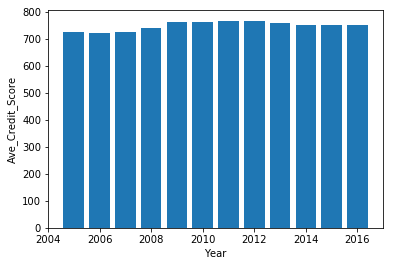

In [11]:
plt.bar([float(x) for x in data["year"]], [float(x) for x in data["aveCreditScore"]])
plt.xlabel("Year")
plt.ylabel("Ave_Credit_Score")
plt.show()

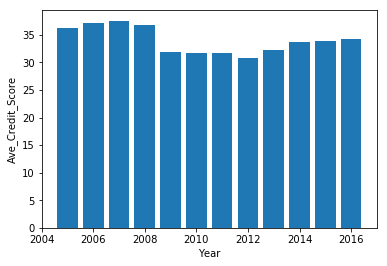

In [12]:
plt.bar([float(x) for x in data["year"]], [float(x) for x in data["aveDTI"]])
plt.xlabel("Year")
plt.ylabel("Ave_Credit_Score")
plt.show()

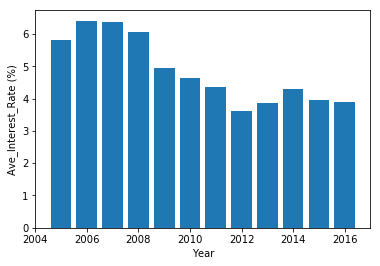

In [13]:
plt.bar([float(x) for x in data["year"]], [float(x) for x in data["aveInterestRate"]])
plt.xlabel("Year")
plt.ylabel("Ave_Interest_Rate (%)")
plt.show()

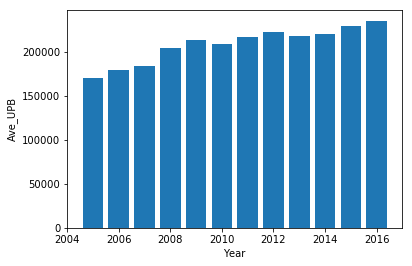

In [14]:
plt.bar([float(x) for x in data["year"]], [float(x) for x in data["aveUPB"]])
plt.xlabel("Year")
plt.ylabel("Ave_UPB")
plt.show()

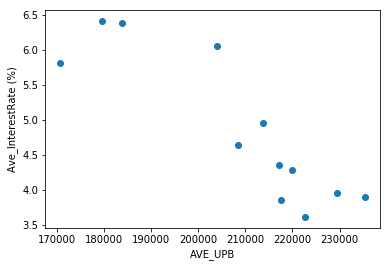

In [15]:
plt.scatter([float(x) for x in data["aveUPB"]], [float(x) for x in data["aveInterestRate"]])
plt.xlabel("AVE_UPB")
plt.ylabel("Ave_InterestRate (%)")
plt.show()

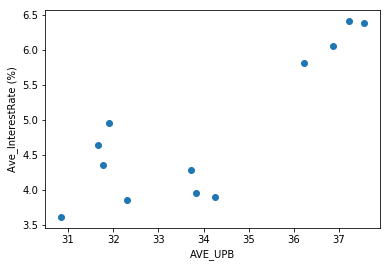

In [16]:
plt.scatter([float(x) for x in data["aveDTI"]], [float(x) for x in data["aveInterestRate"]])
plt.xlabel("AVE_UPB")
plt.ylabel("Ave_InterestRate (%)")
plt.show()

## Orig State Summary File

In [17]:
def orig_SumState(directory, filename):
    orig_state_summary = []
    orig_files = glob.glob(directory + "/sample_orig*.txt")
    for file in orig_files:
        data = pd.read_csv(file, sep=",")
        data = pd.DataFrame(data)
        
        for state in data["property_state"].unique():
            orig_state = OrderedDict()
            
            orig_state["year"] = file[25:29]
            orig_state["state"] = state
            orig_state["loanCount"] = np.count_nonzero(data[data["property_state"]==state]["loan_sequence_no"])
            orig_state["aveCreditScore"] = data[data["property_state"]==state]["credit_score"].mean()
            orig_state["aveMI"] = data[data["property_state"]==state]["mi_percentage"].mean()
            orig_state["aveUnitNumber"] = data[data["property_state"]==state]["no_of_units"].mean()
            orig_state["aveCLTV"] = data[data["property_state"]==state]["original_cltv"].mean() 
            orig_state["aveDTI"] = data[data["property_state"]==state]["original_dti_ratio"].mean()
            orig_state["aveLTV"] = data[data["property_state"]==state]["original_ltv"].mean()
            orig_state["totalUPB"] = data[data["property_state"]==state]["original_upb"].sum() 
            orig_state["aveUPB"] = data[data["property_state"]==state]["original_upb"].mean()
            orig_state["aveInterestRate"] = data[data["property_state"]==state]["original_interest_rate"].mean()
            
            orig_state_summary.append(orig_state)
        
    orig_state_summary = pd.DataFrame(orig_state_summary)
    orig_state_summary.to_csv(filename, sep=",", index=False)
    return orig_state_summary

data = orig_SumState("Cleaned_Data", "Orig_StateSummary_File.csv")
data

/Users/guangnanliang/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,aveCLTV,aveCreditScore,aveDTI,aveInterestRate,aveLTV,aveMI,aveUPB,aveUnitNumber,loanCount,state,totalUPB,year
0,71.314924,729.508218,36.273800,5.776599,69.747535,2.060487,186961.209730,1.023669,1521,WA,284368000,2005
1,67.722572,716.980433,36.114149,5.814560,66.244584,1.382949,207134.870720,1.004193,1431,MD,296410000,2005
2,68.074192,723.922629,35.958438,5.782834,66.645999,3.354531,199899.311076,1.100159,1887,NY,377210000,2005
3,71.958716,717.747706,35.854241,5.821193,70.082569,1.633028,189550.458716,1.009174,218,DE,41322000,2005
4,79.363798,720.856442,35.431520,5.781152,76.515827,5.038787,146818.992421,1.010700,2243,TX,329315000,2005
5,76.208401,723.635433,35.210621,5.872574,74.072698,4.469036,129451.803985,1.023694,1857,OH,240392000,2005
6,69.689902,718.468593,36.243519,5.857650,68.728598,3.397297,168090.644050,1.009011,3773,FL,634206000,2005
7,69.244505,721.571429,39.648352,5.841209,67.835165,1.631868,194002.747253,1.030220,364,NH,70617000,2005
8,71.870410,733.241901,36.883369,5.762003,69.899568,2.213823,173483.801296,1.020518,926,OR,160646000,2005
9,74.625561,727.331839,35.636939,5.850770,72.509716,3.959641,134756.352765,1.018685,1338,MO,180304000,2005


In [19]:
d = data[["state", "loanCount"]]
d = pd.DataFrame(d.groupby('state')['loanCount'].sum()).reset_index()

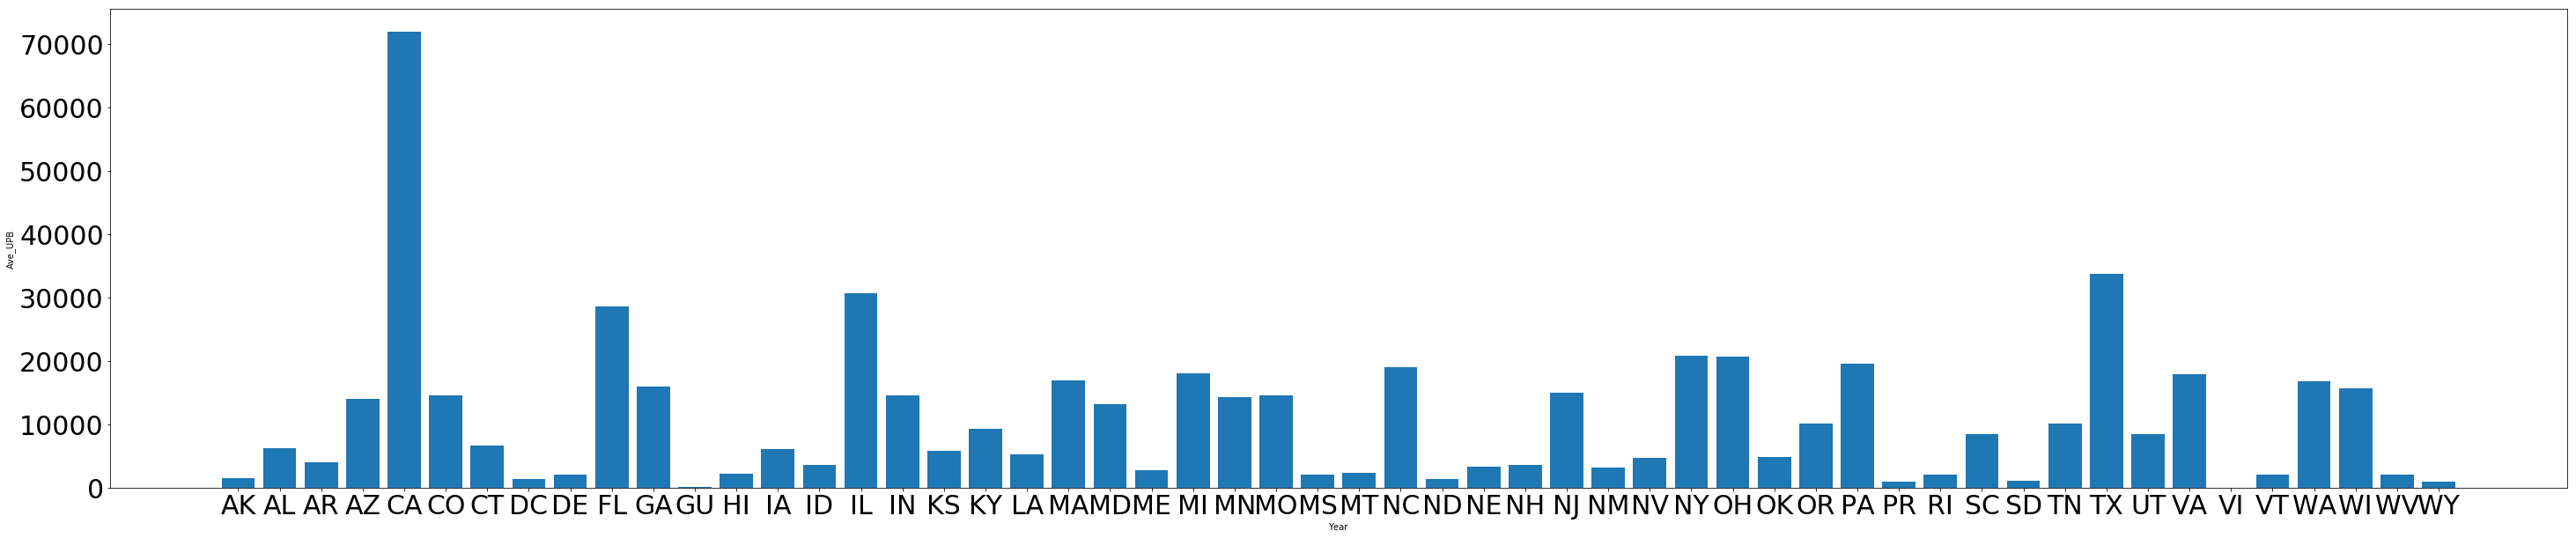

In [20]:
temp = []
plt.figure(figsize=(50,10))
for i in range(54):
    temp.append(i)
plt.bar(temp, d["loanCount"])
plt.xlabel("Year")
plt.ylabel("Ave_UPB")
plt.xticks(temp, d["state"])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()

In [21]:
d = data[["state", "aveMI"]]
d = pd.DataFrame(d.groupby('state')['aveMI'].sum()).reset_index()

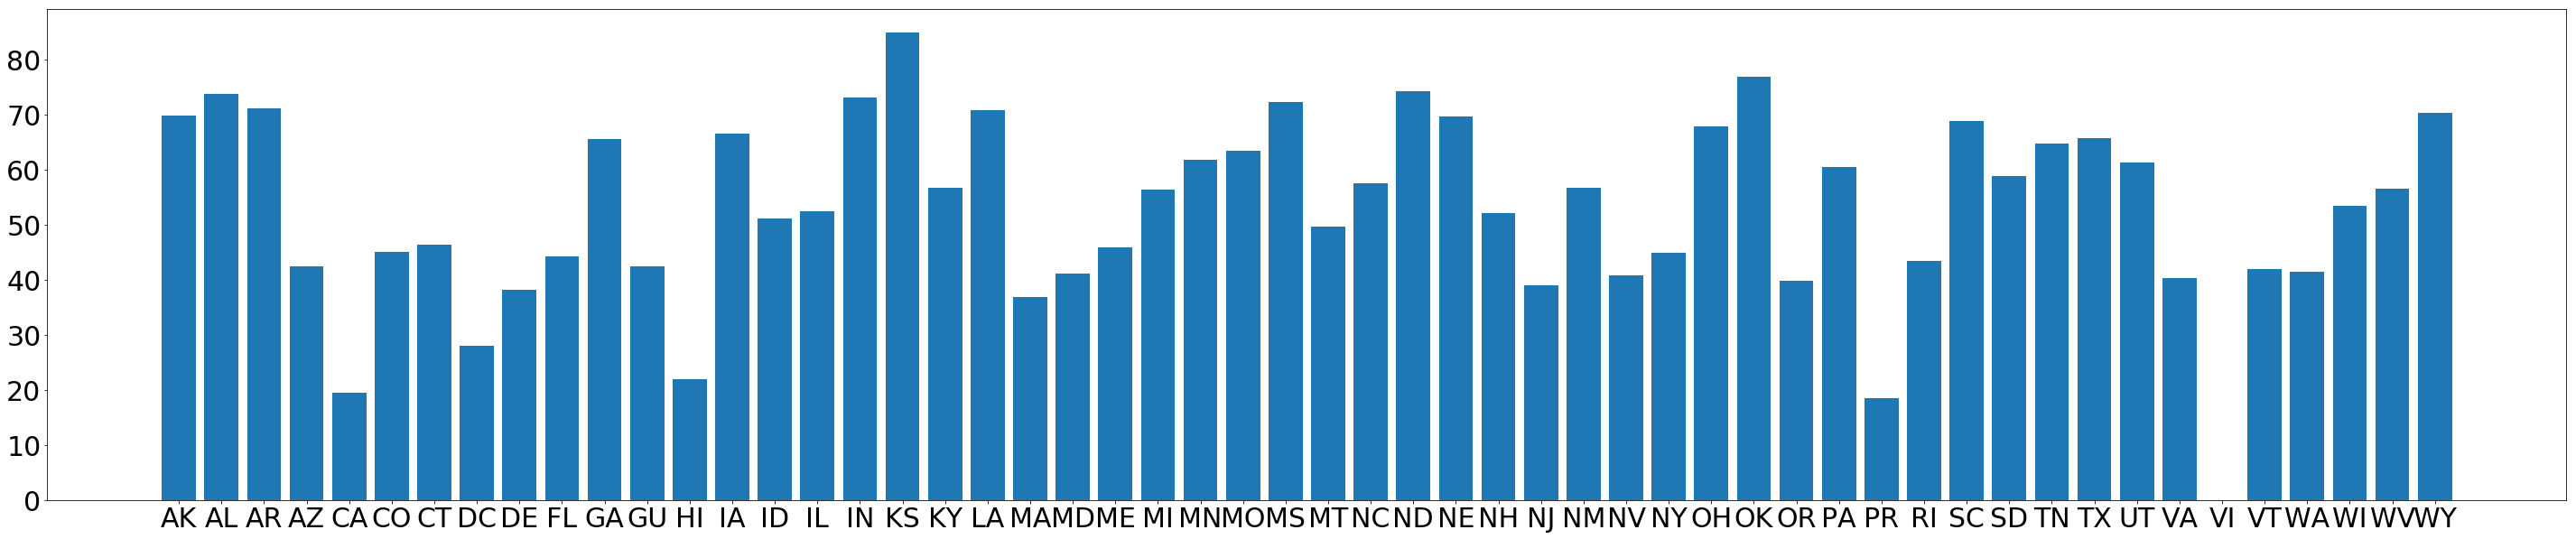

In [22]:
temp = []
plt.figure(figsize=(50,10))
for i in range(54):
    temp.append(i)
plt.bar(temp, d["aveMI"])
plt.xticks(temp, d["state"])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()

## Performance Summary File

In [23]:
def svcg_SumYear(directory, filename):
    svcg_year_summary = []
    svcg_files = glob.glob(directory + "/sample_svcg*.txt")
    for file in svcg_files:
        data = pd.read_table(file, sep="|", names=svcg_attribute, low_memory=False)
        data = pd.DataFrame(data)
        svcg_curyear = OrderedDict()
        
        svcg_curyear['year'] = file[22:26]
        
        d = data[["loan_sequence_no", "current_actual_upb"]]
        d = pd.DataFrame(d.groupby('loan_sequence_no')['current_actual_upb'].min()).reset_index()
        svcg_curyear["totalYearlyUPB"] = d["current_actual_upb"].sum() / 100000000
        
        data["current_loan_delinquency_status"] = data["current_loan_delinquency_status"].astype(str)
        svcg_curyear["delinquencyRate"] = data[data["current_loan_delinquency_status"] =="0"]["current_loan_delinquency_status"].count() / len(data.index)
        
        svcg_curyear["aveInterestRate"] = data["current_interest_rate"].mean()
        
        svcg_year_summary.append(svcg_curyear)
        
    svcg_year_summary = pd.DataFrame(svcg_year_summary)
    svcg_year_summary.to_csv(filename, sep=",", index=False)
    return svcg_year_summary

data = svcg_SumYear("svcg_file", "Svcg_YearlySummary_File.csv")
data

,aveInterestRate,delinquencyRate,totalYearlyUPB,year
0,5.736585,0.951546,6.608231,2005
1,6.282450,0.923818,6.656540,2006
2,6.220069,0.909595,8.195730,2007
3,5.958324,0.938412,7.338225,2008
4,4.945662,0.989150,14.059407,2009
5,4.631132,0.992513,21.476836,2010
6,4.329056,0.994054,30.402219,2011
7,3.602205,0.996997,60.832018,2012
8,3.790308,0.996157,66.318273,2013
9,4.287529,0.994743,65.742939,2014


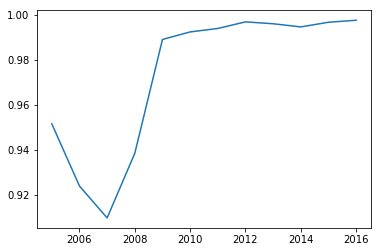

In [24]:
plt.plot(data["year"], data["delinquencyRate"])
plt.show()

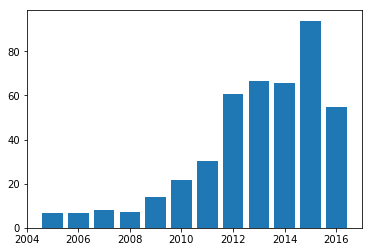

In [25]:
plt.bar([float(x) for x in data["year"]], [float(x) for x in data["totalYearlyUPB"]])
plt.show()

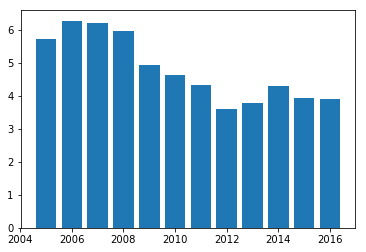

In [26]:
plt.bar([float(x) for x in data["year"]], [float(x) for x in data["aveInterestRate"]])
plt.show()